In [1]:
#Import Library
import os,zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d andrewmvd/animal-faces

 99% 689M/696M [00:05<00:00, 140MB/s]
100% 696M/696M [00:05<00:00, 135MB/s]


In [4]:
local_zip = '/content/animal-faces.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

os.listdir('/tmp')

['pyright-309-cT1mbYXSxvmc',
 'debugger_pb66rqdrh',
 'dap_multiplexer.INFO',
 'pyright-309-o7x9n3zs45RE',
 'language_service.37714c496409.root.log.INFO.20240123-100929.301',
 'afhq',
 'python-languageserver-cancellation',
 'initgoogle_syslog_dir.0',
 'language_service.INFO',
 'dap_multiplexer.37714c496409.root.log.INFO.20240123-100847.85']

In [5]:
data_dir = '/tmp/afhq/train'
dir_cat = os.path.join("/tmp/afhq/train/cat")
dir_dog = os.path.join("/tmp/afhq/train/dog")
dir_wild = os.path.join("/tmp/afhq/train/wild")

In [7]:
total_cat = len(os.listdir(dir_cat))
total_dog = len(os.listdir(dir_dog))
total_wild = len(os.listdir(dir_wild))

# Mencetak jumlah data rock paper scissor
print("Total Data Cat Image   : ",total_cat)
print("Total Data Dog Image   : ",total_dog)
print("Total Data Wild Image  : ",total_wild)

Total Data Cat Image   :  5153
Total Data Dog Image   :  4739
Total Data Wild Image  :  4738


In [8]:
val_size = 0.2

train_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

validation_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

In [9]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size = (150,150),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    subset = "training"
)

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size = (150,150),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = False,
    subset = "validation"
)

Found 11706 images belonging to 3 classes.
Found 2924 images belonging to 3 classes.


In [10]:
# Pembuatan Model dengan tipe Sequential

model = tf.keras.models.Sequential([
    # Convolution pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Convolution kedua
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Convolution ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Convolution keempat
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Layer flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # Hidden layer dengan 512 neuron
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

#model.summary()

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
      print("\nTarget telah tercapai!")
      self.model.stop_training = True

callbacks = Callback()

In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2,
      callbacks=[callbacks])

Epoch 1/100
25/25 - 143s - loss: 2.0186 - accuracy: 0.3123 - val_loss: 1.0973 - val_accuracy: 0.4313 - 143s/epoch - 6s/step
Epoch 2/100
25/25 - 150s - loss: 1.0313 - accuracy: 0.4837 - val_loss: 0.6436 - val_accuracy: 0.8562 - 150s/epoch - 6s/step
Epoch 3/100
25/25 - 152s - loss: 0.8495 - accuracy: 0.6288 - val_loss: 0.8790 - val_accuracy: 0.6250 - 152s/epoch - 6s/step
Epoch 4/100
25/25 - 143s - loss: 0.7363 - accuracy: 0.6988 - val_loss: 0.4263 - val_accuracy: 0.8687 - 143s/epoch - 6s/step
Epoch 5/100
25/25 - 144s - loss: 0.6177 - accuracy: 0.7425 - val_loss: 0.3837 - val_accuracy: 0.8750 - 144s/epoch - 6s/step
Epoch 6/100
25/25 - 143s - loss: 0.6259 - accuracy: 0.7437 - val_loss: 0.4947 - val_accuracy: 0.7937 - 143s/epoch - 6s/step
Epoch 7/100
25/25 - 152s - loss: 0.6153 - accuracy: 0.7325 - val_loss: 0.3813 - val_accuracy: 0.9125 - 152s/epoch - 6s/step
Epoch 8/100
25/25 - 145s - loss: 0.5548 - accuracy: 0.7812 - val_loss: 0.2174 - val_accuracy: 0.9375 - 145s/epoch - 6s/step
Epoch 9/

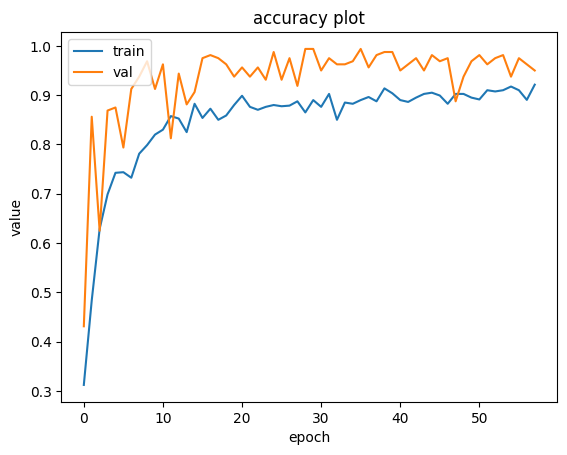

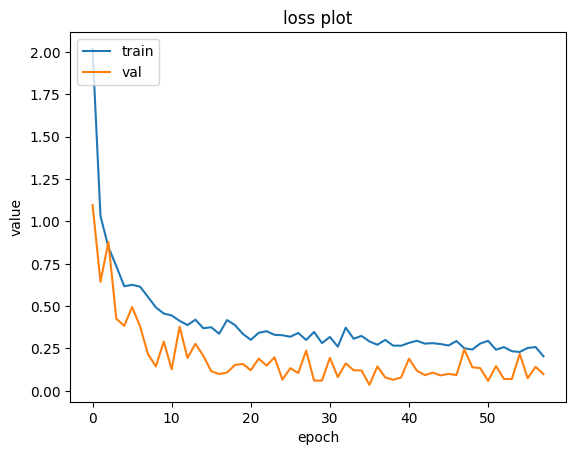

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy plot')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss plot')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
# Convert Model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('RPS_model.tflite', 'wb') as f:
  f.write(tflite_model)